In [ ]:
"""
Created on Sun Feb 2 2020 

@author: Mohammad Daneshvar
"""

This is a project for image classification and I have used a convnet for this purpose. The network is built with Keras library in Tensorflow. 

First, I import the required libraries.

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt
import pprint

I will use Fashion-MNIST data which includes images of clothes from 10 classes:

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot


In [2]:
# Load the fashion-mnist dataset
image_data = tf.keras.datasets.fashion_mnist.load_data()
(Xtrain, Ytrain), (Xtest, Ytest) = image_data

4431872/4422102 [==============================] - 1s 0us/step


The training and test sets are numpy arrays. 

In [4]:
print('Xtrain=%s , Ytrain=%s' %(Xtrain.shape, Ytrain.shape))
print('Xtest=%s , Ytest=%s' %(Xtest.shape, Ytest.shape),'\n')

Xtrain=(60000, 28, 28) , Ytrain=(60000,)
Xtest=(10000, 28, 28) , Ytest=(10000,) 



In [11]:
print('Xtrain[0]=\n', Xtrain[0])

Xtrain[0]=
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   

 To visualize the data, I convert numpy arrays into images using the matplotlib library.

In [13]:
types = 'T_shirt/top Trouser Pullover Dress Coat\
         Sandal Shirt Sneaker Bag Ankle_boot'.split()
labels = {i:types[i] for i in range(10)}  

print(labels)          

{0: 'T_shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle_boot'}


In [15]:
# Create a function to visualize the images
def convert_to_pic(X, Y, figsize):
    fig, ax = plt.subplots(1, len(X), figsize=figsize)
    for i in range(len(X)):
        ax[i].imshow(X[i])
        plt.set_cmap(None)
        ax[i].set_title('%s'%labels[Y[i]])
    plt.tight_layout()
    return

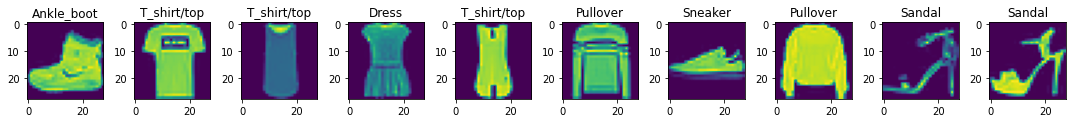

In [17]:
# Plot the first 10 images
convert_to_pic(Xtrain[0:10], Ytrain[0:10], figsize=(15,7) )

Now I build a convolutional neural network with TensorFlow. First, I normalize the data to make values between $0$ and $1$. The normalization technique helps the gradient descent converge more quickly to the global minimum. The formula for the normalization is
$$z_{i} = \frac{max(x)-x_{i}}{max(x)-min(x)}$$

In [18]:
# Normalize the data
Xtrain = Xtrain / 255.
Xtest = Xtest /255.

 There are three main layers in a CNN: a convolutional layer (followed by), a pooling layer and a fully-connected layer (as we have seen in a deep neural network). We will stack all these three main layers using a sequential model. But first, we need to reshape the train set to specify the number of channels for each image. In the fashion_mnist dataset, each image has one channel. More specifically, each image is an array of size $28\times28$ which can be presented as a $28\times28\times1$ image. 

 We can also add a callback for early stopping. This callback stops the training if the loss doesn't decrease (or accuracy doesn't increase). It includes a parameter, called patience, which is a criterion by which we specify when to stop the training. For example, if the patience number is set to $3$, then training stops if the loss (or accuracy) doesn't improve after three epochs.

 We use the 'relu' function for the convolutional layers because this activation function has some advantages over the "sigmoid" and "tanh" functions. It is a non-saturating and less complex function and therefore, the training performance increases. Since we have a multiclass classification, therefore we use the softmax function for the last layer as it outputs the probability of being in each class.

In [19]:
# Reshape the data
Xtrain = Xtrain.reshape((60000,28,28,1))
Xtest = Xtest.reshape((10000,28,28,1))

In [112]:
# Build the convnet layers
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (4,4), input_shape=(28,28,1), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    tf.keras.layers.Conv2D(64, (4,4), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=256, activation='relu'),
                                    tf.keras.layers.Dense(units=10, activation='softmax')])

We can see the summary of the model, to see if it's a good idea to add more layers. In this model, the last max pooling layer reduces the dimension of images to $4\times4$ (with 64 channels), which is small enough and can be flattened for the fully connected layer. Moreover, the total number of parameters for training is $331,658$. 

A $2\times2$ Pooling layer quarters the dimension of images while preserving their main features.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [114]:
# Compile the model
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [115]:
# Fit the model to the data
history = model.fit(Xtrain, Ytrain,
                    batch_size=512,
                    epochs=10,
                    callbacks=[callback])

Epoch 1/10
118/118 [==============================] - 27s 228ms/step - loss: 0.7361 - accuracy: 0.7379
Epoch 2/10
118/118 [==============================] - 31s 265ms/step - loss: 0.4370 - accuracy: 0.8424
Epoch 3/10
118/118 [==============================] - 30s 256ms/step - loss: 0.3805 - accuracy: 0.8629
Epoch 4/10
118/118 [==============================] - 26s 220ms/step - loss: 0.3376 - accuracy: 0.8778
Epoch 5/10
118/118 [==============================] - 27s 225ms/step - loss: 0.3119 - accuracy: 0.8867
Epoch 6/10
118/118 [==============================] - 27s 228ms/step - loss: 0.2964 - accuracy: 0.8909
Epoch 7/10
118/118 [==============================] - 28s 234ms/step - loss: 0.2801 - accuracy: 0.8983
Epoch 8/10
118/118 [==============================] - 27s 227ms/step - loss: 0.2631 - accuracy: 0.9047
Epoch 9/10
118/118 [==============================] - 26s 216ms/step - loss: 0.2489 - accuracy: 0.9095
Epoch 10/10
118/118 [==============================] - 27s 229ms/step - l

In [24]:
# Evaluate the training on the test set
loss, accuracy = model.evaluate(Xtest, Ytest)
print('loss on the test set=', loss)
print('accuracy on the test set=', accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.2913 - accuracy: 0.8942
loss on the test set= 0.29125744104385376
accuracy on the test set= 0.8942000269889832


Accuracy on the test set is slightly less than the accuracy on the train set and this is what we expected. If it was much lower, that could be a sign of overfitting. 

Finally, we see how the model predicts unseen examples in the test set. Gray pictures indicate the correct predictions whereas the red pictures indicate the wrong the predictions.

In [124]:
# Make predictions
def predict(X):
    probabilities = model.predict(X)
    predictions = [np.argmax(prob_arr) for prob_arr in probabilities]
    return predictions
  
# Create a function visualize the predictions
def convert_to_pic(X,a,b):
    cats = predict(X[a:b,:])
    plt.figure(figsize=(20,50))
    for i in range(a,b):
        plt.subplot(10,5,i+1)
        plt.imshow(X[i])
        plt.title('True:'+ labels[Ytest[i]]+', Predict:'+\
                  labels[cats[i-a]])
        if cats[i-a]!= Ytest[i]: 
            plt.set_cmap('Reds')
        else:
            plt.set_cmap('gray')
    plt.tight_layout()   
    plt.show()

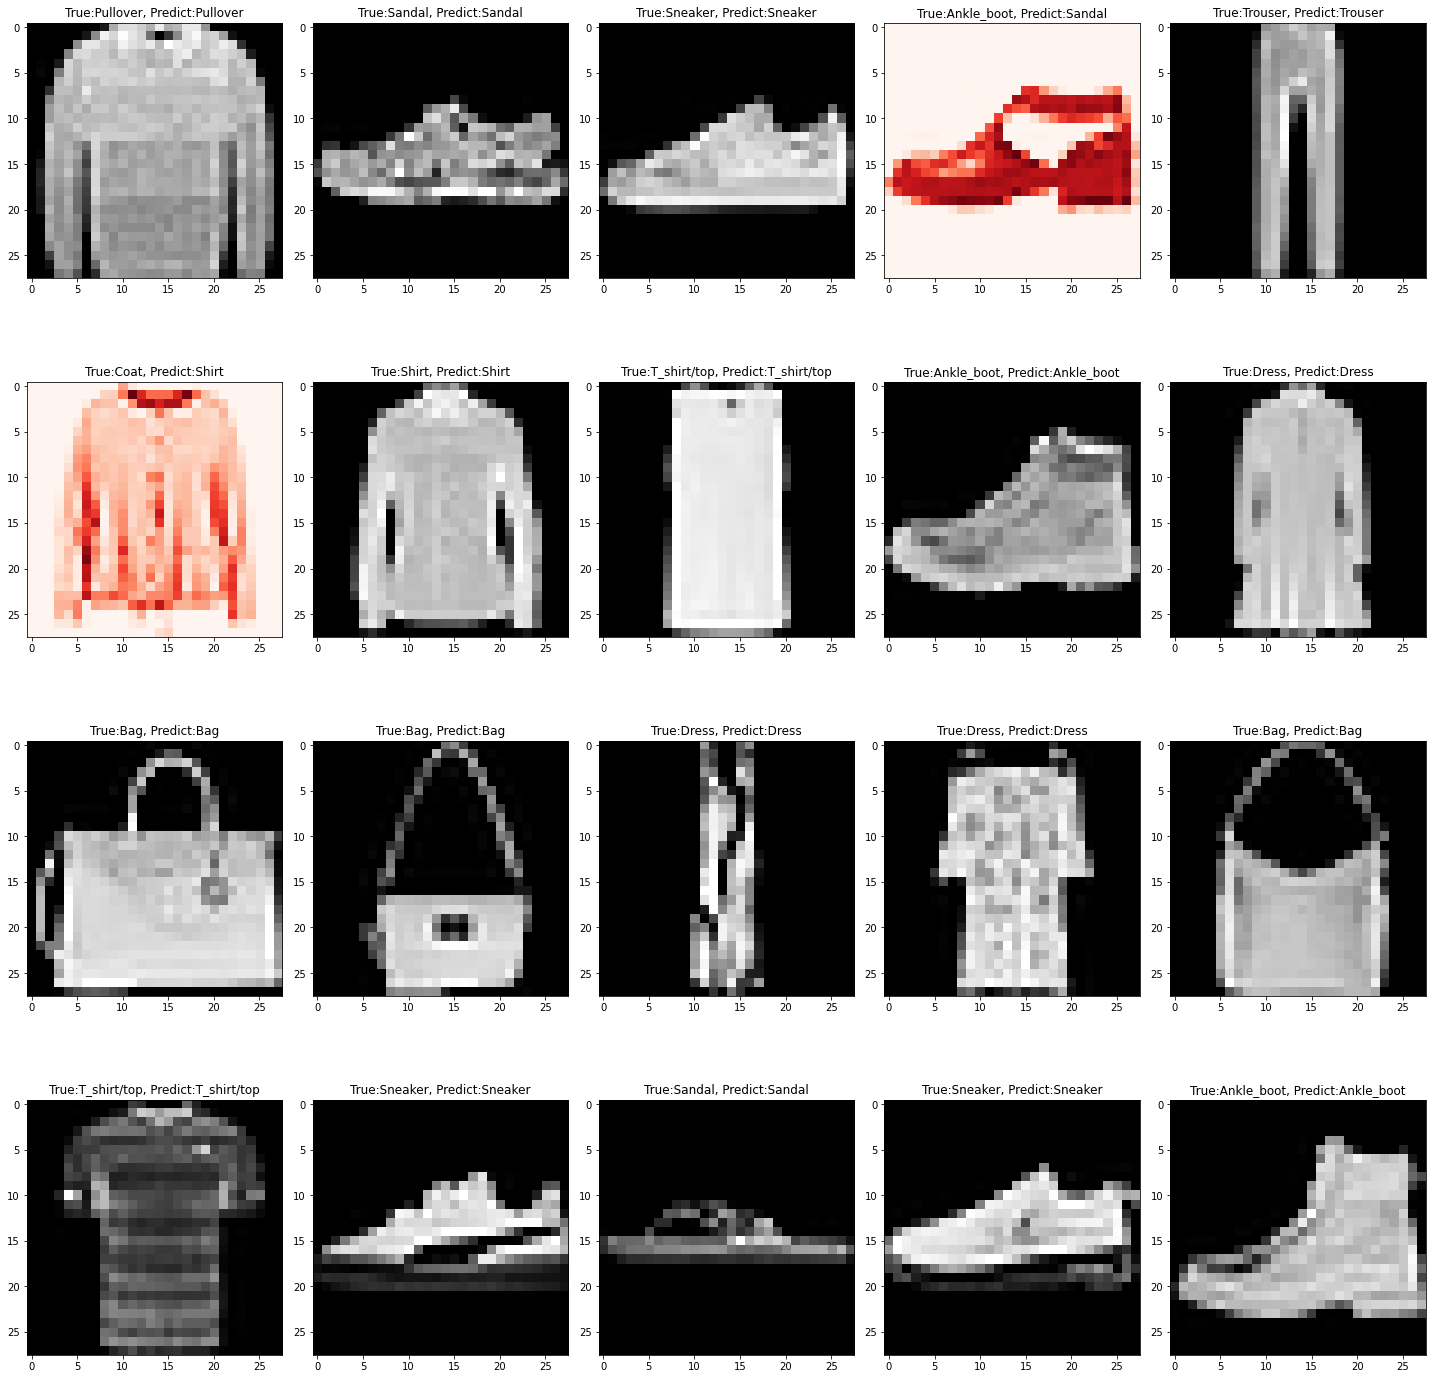

In [125]:
convert_to_pic(Xtest,20,40)